In [ ]:
Ноутбук прохождения курса "PySpark - просто!".

https://stepik.org/course/113489/syllabus

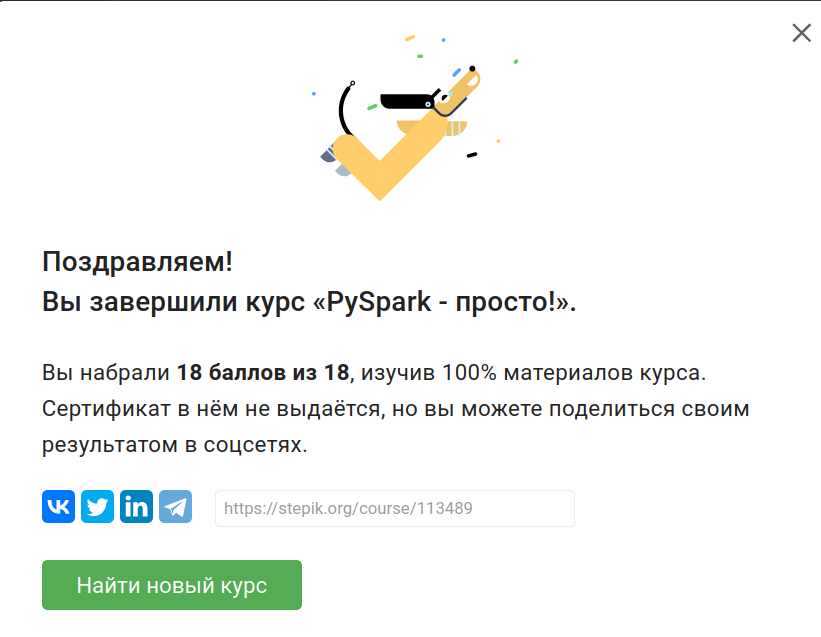

!pip install pyspark

In [1]:
#from pyspark import SparkSession # error
from pyspark.sql import SparkSession

spark = (SparkSession.builder
.master("local[5]")
.appName('PySpark_Tutorial')
.getOrCreate()
)

23/04/30 16:38:51 WARN Utils: Your hostname, yads resolves to a loopback address: 127.0.1.1; using 192.168.0.123 instead (on interface enp2s0)
23/04/30 16:38:51 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/04/30 16:38:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
spark

In [3]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [4]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('date', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=True,
    schema=final_struc 
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [5]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=False,
)

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)



In [6]:
data.dtypes

[('_c0', 'string'),
 ('_c1', 'string'),
 ('_c2', 'string'),
 ('_c3', 'string'),
 ('_c4', 'string'),
 ('_c5', 'string'),
 ('_c6', 'string'),
 ('_c7', 'string'),
 ('_c8', 'string'),
 ('_c9', 'string'),
 ('_c10', 'string'),
 ('_c11', 'string'),
 ('_c12', 'string')]

In [7]:
data.show()

+----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
| _c0|   _c1|       _c2|      _c3|      _c4|      _c5|      _c6|    _c7|      _c8|       _c9|         _c10|                _c11|    _c12|
+----+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|null|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
|   1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|   4|   TXG|2019-09-17|56.209999|

In [8]:
data.head(5)

[Row(_c0=None, _c1='symbol', _c2='date', _c3='open', _c4='high', _c5='low', _c6='close', _c7='volume', _c8='adjusted', _c9='market.cap', _c10='sector', _c11='industry', _c12='exchange'),
 Row(_c0='1', _c1='TXG', _c2='2019-09-12', _c3='54', _c4='58', _c5='51', _c6='52.75', _c7='7326300', _c8='52.75', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='2', _c1='TXG', _c2='2019-09-13', _c3='52.75', _c4='54.355', _c5='49.150002', _c6='52.27', _c7='1025200', _c8='52.27', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='3', _c1='TXG', _c2='2019-09-16', _c3='52.450001', _c4='56', _c5='52.009998', _c6='55.200001', _c7='269900', _c8='55.200001', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='4', _c1='TXG', _c2='2019-09-17', _c3='56.209999', _c4='60.900002', _c5='55.423', _c6='56.779999', _

In [9]:
data.first()

Row(_c0=None, _c1='symbol', _c2='date', _c3='open', _c4='high', _c5='low', _c6='close', _c7='volume', _c8='adjusted', _c9='market.cap', _c10='sector', _c11='industry', _c12='exchange')

In [10]:
data.take(5)

[Row(_c0=None, _c1='symbol', _c2='date', _c3='open', _c4='high', _c5='low', _c6='close', _c7='volume', _c8='adjusted', _c9='market.cap', _c10='sector', _c11='industry', _c12='exchange'),
 Row(_c0='1', _c1='TXG', _c2='2019-09-12', _c3='54', _c4='58', _c5='51', _c6='52.75', _c7='7326300', _c8='52.75', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='2', _c1='TXG', _c2='2019-09-13', _c3='52.75', _c4='54.355', _c5='49.150002', _c6='52.27', _c7='1025200', _c8='52.27', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='3', _c1='TXG', _c2='2019-09-16', _c3='52.450001', _c4='56', _c5='52.009998', _c6='55.200001', _c7='269900', _c8='55.200001', _c9='$9.31B', _c10='Capital Goods', _c11='Biotechnology: Laboratory Analytical Instruments', _c12='NASDAQ'),
 Row(_c0='4', _c1='TXG', _c2='2019-09-17', _c3='56.209999', _c4='60.900002', _c5='55.423', _c6='56.779999', _

In [11]:
data.describe()

DataFrame[summary: string, _c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string]

In [12]:
data.columns

['_c0',
 '_c1',
 '_c2',
 '_c3',
 '_c4',
 '_c5',
 '_c6',
 '_c7',
 '_c8',
 '_c9',
 '_c10',
 '_c11',
 '_c12']

In [13]:
data.count()

1729035

In [14]:
data.select("_c1").distinct().collect()

[Row(_c1='ALXN'),
 Row(_c1='BAND'),
 Row(_c1='BROG'),
 Row(_c1='CBIO'),
 Row(_c1='ABMD'),
 Row(_c1='APM'),
 Row(_c1='BCOV'),
 Row(_c1='BYFC'),
 Row(_c1='EOLS'),
 Row(_c1='EYEN'),
 Row(_c1='ARAY'),
 Row(_c1='CLVS'),
 Row(_c1='CGEN'),
 Row(_c1='ECOR'),
 Row(_c1='AMTX'),
 Row(_c1='BRKR'),
 Row(_c1='CDW'),
 Row(_c1='CHDN'),
 Row(_c1='API'),
 Row(_c1='ARTW'),
 Row(_c1='CASI'),
 Row(_c1='CENT'),
 Row(_c1='CSOD'),
 Row(_c1='EPZM'),
 Row(_c1='ADIL'),
 Row(_c1='AVNW'),
 Row(_c1='CCRC'),
 Row(_c1='CRWD'),
 Row(_c1='EA'),
 Row(_c1='BUSE'),
 Row(_c1='ALDX'),
 Row(_c1='APYX'),
 Row(_c1='CAR'),
 Row(_c1='CNTY'),
 Row(_c1='DLPN'),
 Row(_c1='DXPE'),
 Row(_c1='FHB'),
 Row(_c1='ATCX'),
 Row(_c1='CSIQ'),
 Row(_c1='CACC'),
 Row(_c1='DRAD'),
 Row(_c1='AHCO'),
 Row(_c1='AMRK'),
 Row(_c1='AVXL'),
 Row(_c1='AVEO'),
 Row(_c1='CASA'),
 Row(_c1='INBK'),
 Row(_c1='ASYS'),
 Row(_c1='AVDL'),
 Row(_c1='CATB'),
 Row(_c1='CIH'),
 Row(_c1='AGIO'),
 Row(_c1='CRESY'),
 Row(_c1='EMKR'),
 Row(_c1='AQMS'),
 Row(_c1='CSTE'),

In [15]:
data.distinct().count()

1729035

In [16]:
data = spark.read.csv(
    'data/stocks_price_final.csv',
    sep=',',
    header=True,
)

data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [17]:
data.distinct().count()

23/04/30 16:39:08 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


1729034

In [18]:
data = data.withColumn('new_date_column', data.date)

data.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|_c0|symbol|      date|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|new_date_column|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|  1|   TXG|2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-12|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-13|
|  3|   TXG|2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-16|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-----------

23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [19]:
data = data.withColumnRenamed('date', 'date_changed')

data.show(3)

+---+------+------------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|_c0|symbol|date_changed|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|new_date_column|
+---+------+------------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+---------------+
|  1|   TXG|  2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-12|
|  2|   TXG|  2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-13|
|  3|   TXG|  2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|     2019-09-16|
+---+------+------------+---------+------+---------+---------+-------+---------+--------

23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [20]:
data = data.drop('new_date_column')

data.show(3)

+---+------+------------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|date_changed|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+------------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|  2019-09-12|       54|    58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|  2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|  2019-09-16|52.450001|    56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+------------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
only showing top 3 rows



23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


# 3.6 Манипуляции со столбцами

In [21]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('data/stocks_price_final.csv', sep=',', header=True, schema=final_struc)

In [22]:
data = data.withColumn('new_volume', data.volume)

data.show(3)

+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|  high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|new_volume|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|  58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|   7326300|
|  2|   TXG|2019-09-13|    52.75|54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|   1025200|
|  3|   TXG|2019-09-16|52.450001|  56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|    269900|
+---+------+----------+---------+------+---------+---------+-------+---------+----------+-------------+--------------------+------

23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [23]:
data = data.drop('symbol', 'close', 'volume', 'adjusted', 'market.cap', 'exchange')

data.show(3)

+---+----------+---------+------+---------+-------------+--------------------+----------+
|_c0|      data|     open|  high|      low|       sector|            industry|new_volume|
+---+----------+---------+------+---------+-------------+--------------------+----------+
|  1|2019-09-12|     54.0|  58.0|     51.0|Capital Goods|Biotechnology: La...|   7326300|
|  2|2019-09-13|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|
|  3|2019-09-16|52.450001|  56.0|52.009998|Capital Goods|Biotechnology: La...|    269900|
+---+----------+---------+------+---------+-------------+--------------------+----------+
only showing top 3 rows



23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , date, open, high, low, volume, sector, industry
 Schema: _c0, data, open, high, low, volume, sector, industry
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [24]:
data = (data
    .withColumn('new_low',data.high)
    .withColumn('new_high',data.low)
    .drop('high', 'low')
    .withColumnRenamed('new_high', 'high')
    .withColumnRenamed('new_low','low')
    )
data.show(3)

+---+----------+---------+-------------+--------------------+----------+------+---------+
|_c0|      data|     open|       sector|            industry|new_volume|   low|     high|
+---+----------+---------+-------------+--------------------+----------+------+---------+
|  1|2019-09-12|     54.0|Capital Goods|Biotechnology: La...|   7326300|  58.0|     51.0|
|  2|2019-09-13|    52.75|Capital Goods|Biotechnology: La...|   1025200|54.355|49.150002|
|  3|2019-09-16|52.450001|Capital Goods|Biotechnology: La...|    269900|  56.0|52.009998|
+---+----------+---------+-------------+--------------------+----------+------+---------+
only showing top 3 rows



23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , date, open, high, low, volume, sector, industry
 Schema: _c0, data, open, high, low, volume, sector, industry
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


data = data.withColumnRenamed('data', 'date_changed')

data.show(3)

In [25]:
new_data = data.select('_c0', 'open', 'low', 'high', 'sector', 'industry', 'new_volume', 'data')

new_data.show(3)

+---+---------+------+---------+-------------+--------------------+----------+----------+
|_c0|     open|   low|     high|       sector|            industry|new_volume|      data|
+---+---------+------+---------+-------------+--------------------+----------+----------+
|  1|     54.0|  58.0|     51.0|Capital Goods|Biotechnology: La...|   7326300|2019-09-12|
|  2|    52.75|54.355|49.150002|Capital Goods|Biotechnology: La...|   1025200|2019-09-13|
|  3|52.450001|  56.0|52.009998|Capital Goods|Biotechnology: La...|    269900|2019-09-16|
+---+---------+------+---------+-------------+--------------------+----------+----------+
only showing top 3 rows



23/04/30 16:39:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , date, open, high, low, volume, sector, industry
 Schema: _c0, data, open, high, low, volume, sector, industry
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


# 3.7 Работа с недостающими значениями

In [26]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market_cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('data/stocks_price_final.csv', sep=',', header=True, schema=final_struc)\
             .withColumnRenamed('market.cap','market_cap')

import pyspark.sql.functions as f

# Удаление строк с пропущенными значениями
data.na.drop()

# Замена отсутствующих значений средним
data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# Замена отсутствующих значений новыми
data.na.replace(old_value, new_value)

In [27]:
import pyspark.sql.functions as f

# Удаление строк с пропущенными значениями
data.na.drop().count()

23/04/30 16:39:12 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market_cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


1725207

In [28]:
data.count() - data.na.drop().count()

23/04/30 16:39:13 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market_cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


3827

In [29]:
data.dropna(how="all").count()

23/04/30 16:39:14 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market_cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


1729034

# 3.8 Получение данных

In [30]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market_cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('data/stocks_price_final.csv', sep=',', header=True, schema=final_struc)\
             .withColumnRenamed('market.cap','market_cap')

In [31]:
data.describe()

DataFrame[summary: string, _c0: string, symbol: string, open: string, high: string, low: string, close: string, volume: string, adjusted: string, market_cap: string, sector: string, industry: string, exchange: string]

In [32]:
import pyspark.sql.functions as F

In [33]:
#Filter

#Данный метод фильтрует данные на основе заданного условия. Вы также можете указать несколько условий, 
#используя операторы AND (&), OR (|) и NOT (~). Вот пример получения данных о ценах на акции за январь 2020 года.

data.filter( (F.col('data') >= F.lit('2020-01-01')) & (F.col('data') <= F.lit('2020-01-31')) ).show(5)


+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close|volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+------+---------+----------+-------------+--------------------+--------+
| 78|   TXG|2020-01-02|76.910004|77.989998|71.480003|72.830002|220200|72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 79|   TXG|2020-01-03|71.519997|76.188004|70.580002|75.559998|288300|75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 80|   TXG|2020-01-06|75.269997|77.349998|73.559998|75.550003|220600|75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 81|   TXG|2020-01-07|     76.0|77.279999|    75.32|75.980003|182400|75.980003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 82|   TXG|2020-01-08|76.089996|76.949997|72.73

23/04/30 16:39:15 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market_cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [34]:
#Between

#Этот метод возвращает True, если проверяемое значение принадлежит указанному отрезку, иначе — False. 
#Давайте посмотрим на пример отбора данных, в которых значения adjusted находятся в диапазоне от 100 до 500.

data.filter(data.adjusted.between(100.0, 500.0)).show(3)

+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
| 93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
| 95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+
only showing 

23/04/30 16:39:16 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , symbol, date, open, high, low, close, volume, adjusted, market.cap, sector, industry, exchange
 Schema: _c0, symbol, data, open, high, low, close, volume, adjusted, market_cap, sector, industry, exchange
Expected: _c0 but found: 
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [35]:
#When

#Он возвращает 0 или 1 в зависимости от заданного условия. В приведенном ниже примере показано, как выбрать 
#такие цены на момент открытия и закрытия торгов, при которых скорректированная цена была больше или равна 200.

data.select(F.col('open'), F.col('close'), F.when(data.adjusted >= 200.0, 1).otherwise(0)).show(3)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 3 rows



In [36]:
#Like

#Этот метод похож на оператор Like в SQL. Приведенный ниже код демонстрирует использование rlike() для извлечения 
#имен секторов, которые начинаются с букв B или C.

data.select(
    'sector', 
    data.sector.rlike('^[B,C]').alias('Колонка sector начинается с B или C')
).distinct().show()

+--------------------+-----------------------------------+
|              sector|Колонка sector начинается с B или C|
+--------------------+-----------------------------------+
|         Health Care|                              false|
|       Capital Goods|                               true|
|Consumer Non-Dura...|                               true|
|    Public Utilities|                              false|
|   Consumer Durables|                               true|
|             Finance|                              false|
|      Transportation|                              false|
|       Miscellaneous|                              false|
|   Consumer Services|                               true|
|              Energy|                              false|
|    Basic Industries|                               true|
|          Technology|                              false|
+--------------------+-----------------------------------+



In [38]:
#GroupBy

#Само название подсказывает, что данная функция группирует данные по выбранному столбцу и выполняет различные 
# операции, такие как вычисление суммы, среднего, минимального, максимального значения и т. д. В приведенном ниже
#примере объясняется, как получить среднюю цену открытия, закрытия и скорректированную цену акций по отраслям.

(data.select(['industry', 'open', 'close', 'adjusted'])
    .groupBy('industry')
    .mean()
    .show()
)

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...|  5.13440178571429| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775| 16.35987909030613|16.148959322959193|
|Investment Banker...|58.950580945750275|58.983085960826266|  58.1578372589032|
|   Food Distributors|43.274508569354545| 43.27317810574848| 42.91047608357858|
|Miscellaneous man...|15.660586409948984|15.650934860969391|15.369818847193862|
|        Broadcasting|24.916787464825187| 24.91738845539513|24.699102029625283|
|Agricultural Chem...|22.046413928996607| 22.04205107631801|21.635093418154767|
|Biotechnology: Bi...|24.808083192324368| 24.80358714993546|24.745079978273214|
|Other Specialty S...| 84.80718810562857|  84.8027655092983| 84.55525036482356|
|Biotechnology: El...|33.368917345350454

Агрегирование

PySpark предоставляет встроенные стандартные функции агрегации, определенные в API DataFrame, они могут пригодится, когда нам нужно выполнить агрегирование значений ваших столбцов. Другими словами, такие функции работают с группами строк и вычисляют единственное возвращаемое значение для каждой группы.

В приведенном ниже примере показано, как отобразить минимальные, максимальные и средние значения цен открытия, закрытия и скорректированных цен акций в промежутке с января 2019 года по январь 2020 года для каждого сектора.


In [39]:
import pyspark.sql.functions as F

(data.filter((F.col('data') >= F.lit('2019-01-02')) & (F.col('data') <= F.lit('2020-01-31')))
    .groupBy("sector")
    .agg(
         F.min("data").alias("С"), 
         F.max("data").alias("По"), 
         
         F.min("open").alias("Минимум при открытии"),
         F.max("open").alias("Максимум при открытии"), 
         F.avg("open").alias("Среднее в open"), 

         F.min("close").alias("Минимум при закрытии"), 
         F.max("close").alias("Максимум при закрытии"), 
         F.avg("close").alias("Среднее в close"), 

         F.min("adjusted").alias("Скорректированный минимум"), 
         F.max("adjusted").alias("Скорректированный максимум"), 
         F.avg("adjusted").alias("Среднее в adjusted"), 

      ).show(truncate=False)
)

23/04/30 16:40:37 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: date, open, close, adjusted, sector
 Schema: data, open, close, adjusted, sector
Expected: data but found: date
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|sector               |С         |По        |Минимум при открытии|Максимум при открытии|Среднее в open    |Минимум при закрытии|Максимум при закрытии|Среднее в close   |Скорректированный минимум|Скорректированный максимум|Среднее в adjusted|
+---------------------+----------+----------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+-------------------------+--------------------------+------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16                |690.0                |51.51619596530087 |0.16                |691.099976           |51.549534122690325|0.16                     |691.099976                |51.21050733851888 |
|Health Care          |2019-01-0

In [40]:
data = spark.read.csv('data/bank.csv', sep=';', header=True)

In [41]:
data.show(2)

+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|       job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|  services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
+---+----------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
only showing top 2 rows



Здесь простые задания по агрегированию

In [42]:
(data
    .groupBy("age")
    .agg(
         F.count("y").alias("count"), 
      ).orderBy(F.col('count').desc()).show(5)
)

+---+-----+
|age|count|
+---+-----+
| 34|  231|
| 32|  224|
| 31|  199|
| 36|  188|
| 33|  186|
+---+-----+
only showing top 5 rows



In [43]:
(data
    .groupBy("age")
    .agg(
         F.count("y").alias("count"), 
      ).orderBy(F.col('age')).show(5)
)

+---+-----+
|age|count|
+---+-----+
| 19|    4|
| 20|    3|
| 21|    7|
| 22|    9|
| 23|   20|
+---+-----+
only showing top 5 rows



In [44]:
(data
    .filter((F.col('age') > 30))
    .groupBy("age")
    .agg(
         F.count("y").alias("count"), 
      ).orderBy(F.col('age')).show(5)
)

+---+-----+
|age|count|
+---+-----+
| 31|  199|
| 32|  224|
| 33|  186|
| 34|  231|
| 35|  180|
+---+-----+
only showing top 5 rows



# 3.9 Визуализация данных

In [45]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), nullable=True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market_cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv('data/stocks_price_final.csv', sep=',', header=True, schema=final_struc)\
             .withColumnRenamed('market.cap','market_cap')

!pip install matplotlib

!pip install pandas

In [46]:
data.select(['sector', 
            'open', 
            'close', 
            'adjusted']
            )\
                     .groupBy('sector')\
                     .mean().show(2)

+-------------+------------------+------------------+------------------+
|       sector|         avg(open)|        avg(close)|     avg(adjusted)|
+-------------+------------------+------------------+------------------+
|Miscellaneous|52.038394969006546| 52.06362854950957| 51.80973033632293|
|  Health Care|119.96763306523289|119.07806125419091|118.97394778016293|
+-------------+------------------+------------------+------------------+
only showing top 2 rows



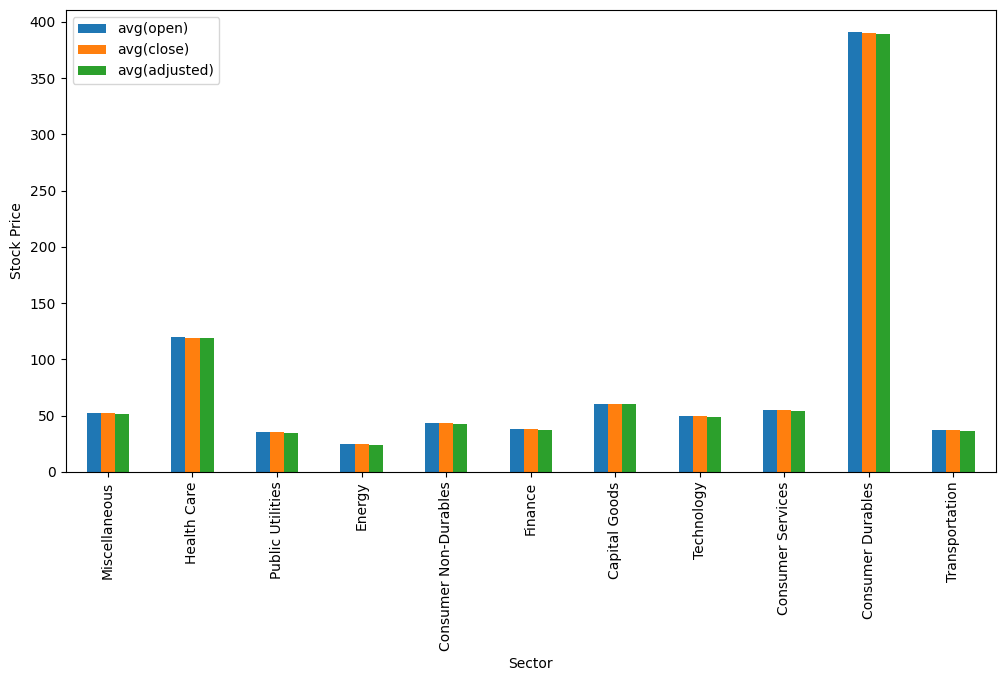

In [47]:
from matplotlib import pyplot as plt

sec_df =  data.select(['sector', 
                       'open', 
                       'close', 
                       'adjusted']
                     )\
                     .groupBy('sector')\
                     .mean()\
                     .toPandas()

ind = list(range(12))
ind.pop(6)

sec_df.iloc[ind ,:].plot(kind='bar', x='sector', y=sec_df.columns.tolist()[1:], 
                         figsize=(12, 6), ylabel='Stock Price', xlabel='Sector')
plt.show()

In [48]:
data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().show(2)

+--------------------+-----------------+-----------------+------------------+
|            industry|        avg(open)|       avg(close)|     avg(adjusted)|
+--------------------+-----------------+-----------------+------------------+
|Finance/Investors...| 5.13440178571429|5.136630739795919| 4.991354066964286|
|       Miscellaneous|16.38588266938775|16.35987909030613|16.148959322959193|
+--------------------+-----------------+-----------------+------------------+
only showing top 2 rows



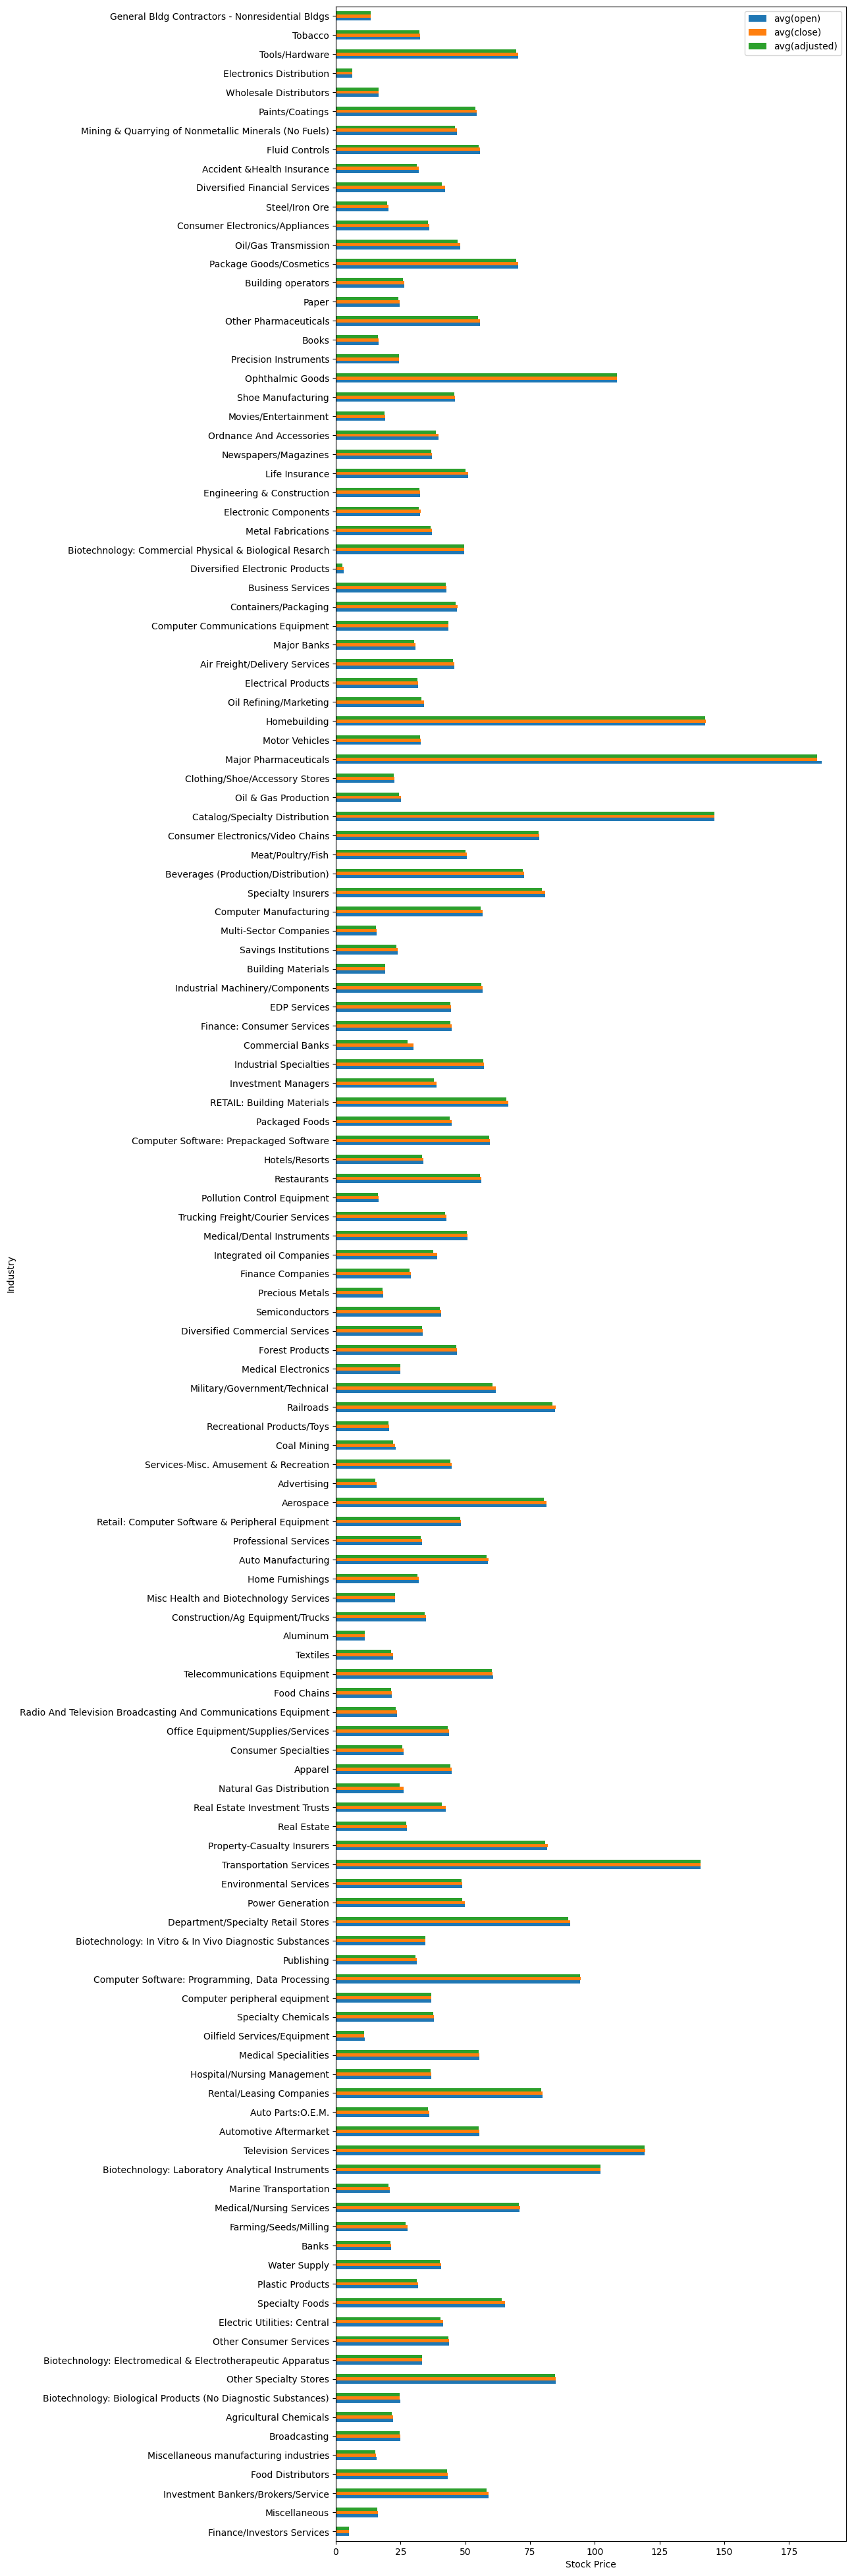

In [49]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']) \
                .groupBy('industry') \
                .agg(
                    F.avg('open'),
                    F.avg('close'),
                    F.avg('adjusted')).toPandas()

q  = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]
q.plot(kind='barh', x='industry', y=q.columns.tolist()[1:], figsize=(10, 50), xlabel='Stock Price', ylabel='Industry')

plt.show()

In [50]:
data.select(F.col('sector')).show(2)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 2 rows



In [51]:
data.filter(F.col('sector') == 'Technology') \
                .select(F.col('data'), F.col('open'), F.col('close'), F.col('adjusted'))

DataFrame[data: date, open: double, close: double, adjusted: double]

In [52]:
#подготовка датафрейма
tech_df =  data.filter(F.col('sector') == 'Technology') \
                .select(F.col('data'), F.col('open'), F.col('close'), F.col('adjusted')) \
                .groupby('data') \
                .mean() \
                .orderBy('data') \
                .toPandas()

23/04/30 16:40:52 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: date, open, close, adjusted, sector
 Schema: data, open, close, adjusted, sector
Expected: data but found: date
CSV file: file:///home/yads/ANACONDA_NAVIGATOR/PYSPARK/data/stocks_price_final.csv


In [53]:
#функция, чтобы разделить временные промежутки на 10 отрезков
def date_range(start, end, intv):
    from datetime import datetime
    diff = (end  - start ) / intv
    for i in range(intv):
        yield (start + diff * i)
    yield end

begin = tech_df['data'].min()
end = tech_df['data'].max()
date_interavals = list(date_range(begin, end, 10))

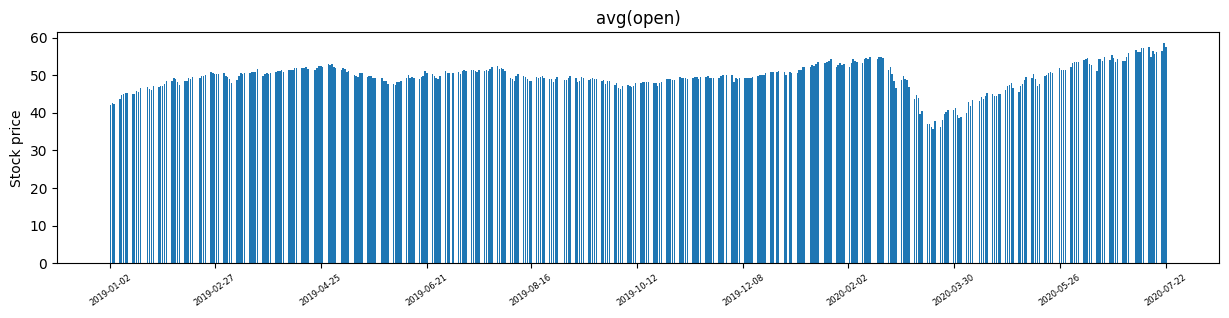

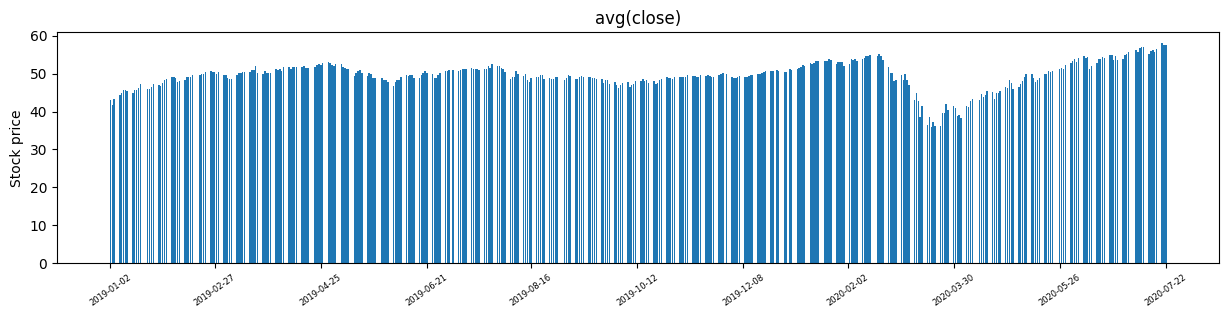

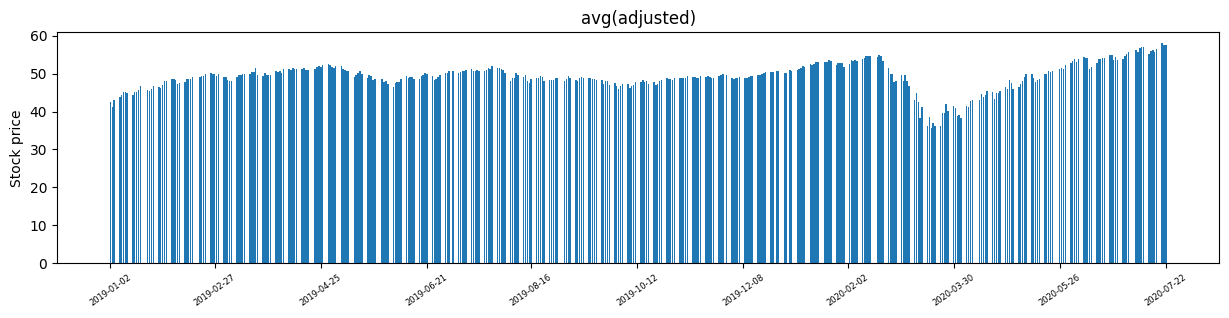

In [54]:
#Построение графиков

for i in range(1,4):
    plt.figure(figsize=(15, 3))
    stock_prices = tech_df.iloc[:, i].values
    column_name = tech_df.columns[i]
    plt.bar(tech_df['data'].values, stock_prices)
    plt.ylabel('Stock price')
    plt.xticks(date_interavals, rotation=35, fontsize=6)
    plt.title(column_name)
    plt.show()

# Экзамен

!curl https://raw.githubusercontent.com/gabminamedez/spotify-data/master/data.csv >> data/data.csv

In [55]:
import pyspark.sql.functions as F

In [56]:
schema = StructType(
    [
        StructField("id", StringType(), nullable=True),
        StructField("name", StringType(), True),
        StructField("artists", StringType(), True),
        StructField("duration_ms", DoubleType(), True),
        StructField("release_date", DateType(), True),
        StructField("year", IntegerType(), True),
        StructField("acousticness", StringType(), True),
        StructField("danceability", StringType(), True),
        StructField("energy", StringType(), True),
        StructField("instrumentalness", StringType(), True),
        StructField("liveness", StringType(), True),
        StructField("loudness", StringType(), True),
        StructField("speechiness", StringType(), True),
        StructField("tempo", StringType(), True),
        StructField("valence", StringType(), True),
        StructField("mode", StringType(), True),
        StructField("key", StringType(), True),
        StructField("popularity", DoubleType(), True),
        StructField("explicit", StringType(), True),
    ]
)

data = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .schema(schema)
    .csv("data/data.csv")
)

Отобразить изменение средних значений аудио характеристик от года к году.

Такими характеристиками являются acousticness, danceability, energy, speechiness, liveness и valence . Произвести сортировку полученной таблицы по столбцу year по возрастанию. Средние значения округлить до 2ух знаков после запятой. 

In [57]:
(data
    .groupBy("year")
    .agg(
         F.round(F.avg("acousticness"), 2).alias("acousticness"), 
         F.round(F.avg("danceability"), 2).alias("danceability"), 
         F.round(F.avg("energy"), 2).alias("energy"), 
         F.round(F.avg("liveness"), 2).alias("liveness"), 
         F.round(F.avg("speechiness"), 2).alias("speechiness"),
         F.round(F.avg("valence"), 2).alias("valence")).orderBy(F.col('year')).show(5)
)

+----+------------+------------+------+--------+-----------+-------+
|year|acousticness|danceability|energy|liveness|speechiness|valence|
+----+------------+------------+------+--------+-----------+-------+
|1921|         0.9|        0.43|  0.24|    0.22|       0.08|   0.43|
|1922|        0.94|        0.48|  0.24|    0.24|       0.12|   0.53|
|1923|        0.98|        0.57|  0.25|    0.24|        0.1|   0.62|
|1924|        0.94|        0.55|  0.35|    0.24|       0.09|   0.67|
|1925|        0.97|        0.57|  0.26|    0.24|       0.12|   0.62|
+----+------------+------------+------+--------+-----------+-------+
only showing top 5 rows



Найти количество произведений, выпущенных с 1951 года, в авторах которых присутствует "Sergei Rachmaninoff".

In [58]:
data = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .csv("data/data.csv")
)

In [59]:
(data
     .select(F.col('release_date'), F.col('year'), F.col('artists'))
     .filter(F.col('year') > '1950-01-01')
     .filter(F.col('artists').contains('Sergei Rachmaninoff'))
    ).count()

46

Найти наиболее популярных артистов (средняя популярность всех произведений, в которых упомянут артист).

Выборку производить из тех артистов, у которых общее количество упоминаний в произведениях не менее 200.

In [60]:
data = (
    spark.read.option("delimiter", ",")
    .option("header", True)
    .option("escape", '"')
    .csv("data/data.csv")
)

In [61]:
data.show(5)

+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|                  id|                name|             artists|duration_ms|release_date|year|acousticness|danceability|energy|instrumentalness|liveness|loudness|speechiness|  tempo|valence|mode|key|popularity|explicit|
+--------------------+--------------------+--------------------+-----------+------------+----+------------+------------+------+----------------+--------+--------+-----------+-------+-------+----+---+----------+--------+
|6KbQ3uYMLKb5jDxLF...|Singende Bataillo...| ['Carl Woitschach']|     158648|        1928|1928|       0.995|       0.708| 0.195|           0.563|   0.151| -12.428|     0.0506|118.469|  0.779|   1| 10|         0|       0|
|6KuQTIu1KoTTkLXKr...|Fantasiestücke, O...|['Robert Schumann...|     282133|        1928|1928|       0.994|       0.379|

https://stackoverflow.com/questions/57603391/convert-stringtype-column-to-arraytype-in-pyspark

 Dont work
 
 df_new = data.withColumn("artists", F.array(data["artists"]))

In [62]:
df_new = data.withColumn("artists", F.split(F.regexp_replace(F.col("artists"), r"(^\[)|(\]$)|(')", ""), ", "))
df_new.printSchema()

root
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- artists: array (nullable = true)
 |    |-- element: string (containsNull = false)
 |-- duration_ms: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- key: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- explicit: string (nullable = true)



In [63]:
df_new.select(F.col("artists")).show(5)

+--------------------+
|             artists|
+--------------------+
|   [Carl Woitschach]|
|[Robert Schumann,...|
|[Seweryn Goszczyń...|
|  [Francisco Canaro]|
|[Frédéric Chopin,...|
+--------------------+
only showing top 5 rows



In [64]:
df_res = df_new.select(F.explode(df_new.artists).alias('artist'), df_new.popularity)

In [65]:
(df_res.select(['artist','popularity'])
     .groupBy('artist')
     .agg(F.avg('popularity').alias('avg_pop'),
          F.count('artist').alias('count'))
     .filter(F.col('count')>=200)
     .orderBy(F.col('avg_pop').desc(),F.col('count').desc())
     .select('artist')
     .show(5) 
)

+------------+
|      artist|
+------------+
|       Drake|
|  Kanye West|
|Taylor Swift|
|      Eminem|
|   Lil Wayne|
+------------+
only showing top 5 rows

